In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pdư
import seaborn as sns

In [ ]:
# Load data

dataset = pd.read_csv('./data/Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

# Central Limit Theorem (CLT)

## Statement

The Law of Large Number tells us the more samples we have, the better we can approximate the distribution mean, i.e. the sampling mean will converge to the distribution mean when the number of samples goes to infinity.

The question is: *How the sampling means distribute around the true distribution mean?* The Central Limit Theorem gives us an answer when considering the mean of i.i.d random variables ([Source](https://en.wikipedia.org/wiki/Central_limit_theorem#Classical_CLT)).

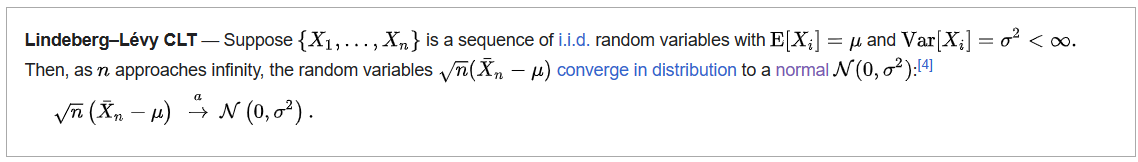, 

where $\overline{X}_n = \frac{1}{n}(X_1 + X_2 + \cdots + X_n)$.

From CLT, we can approximate *how well* the sampling mean can approximate the distribution mean.

## CLT for mean inference

In [ ]:
sns.distplot(y, hist=True, kde=True, 
             bins=30, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'color': 'red'})
plt.xlabel('Salary')
plt.title('Salary Distribution')

In [ ]:
y_mean, y_std = np.mean(y), np.std(y)
print('Number of data points: ', len(y))
print("Sampling mean: ", y_mean)
print("Sampling std: ", y_std)

From CLT, we have

$$\hat{\mu} = \text{Sampling mean} = 76,003 \qquad \text{and} \qquad \hat{\sigma}_{\mu} = \frac{\text{Sampling std}}{\sqrt{N}} \approx 4,921.$$

# Bootstrap for statistical inference

## What is Bootstrap?

### Method

The following figure, along with its caption, illustrates the method of bootstrap. Bootstrap is usually useful for assessing statistical accuracy of any statistics.

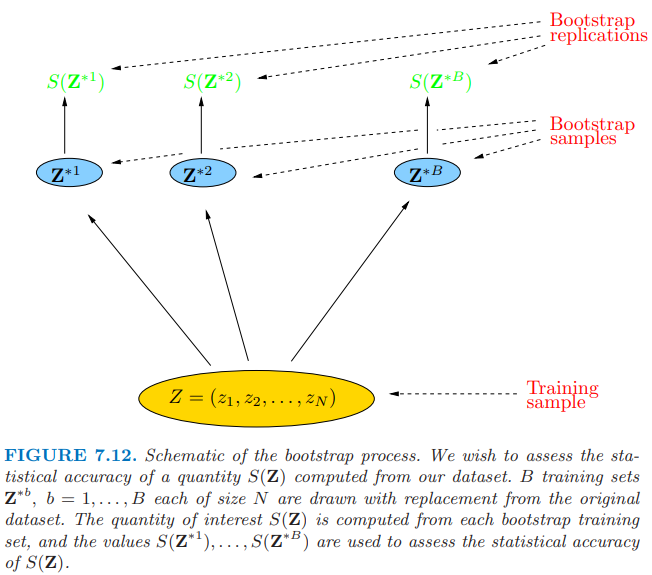

### Word origin

The bootstrap is part of a boot that helps pull the boot up when putting it on. From this origin, "bootstrap" as a verb can be interpreted as to lift something up by using itself.

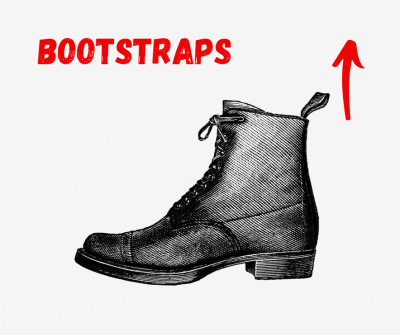

## Boostrap for mean inference

In [ ]:
B = 10000
bootstrap_means = []
for _ in range(B):
    # Sample from the data with replacement
    sample = np.random.choice(y, size=len(y), replace=True)

    # Compute the mean of the sample
    sample_mean = np.mean(sample)
    # Append the sample mean to the list of sample means
    bootstrap_means.append(sample_mean)

In [ ]:
sns.distplot(bootstrap_means, hist=True, kde=True, 
             bins=30, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'color': 'red'})
plt.xlabel('Bootstrap Sample Mean')
plt.title('Distribution of the Sample Means')

In [ ]:
mean_bootstrap_mean, mean_bootstrap_std = np.mean(bootstrap_means), np.std(bootstrap_means)
print('Mean Bootstrap mean: ', mean_bootstrap_mean)
print('Mean Bootstrap std: ', mean_bootstrap_std)

### Estimating Confidence Interval (CI)

#### What is Confidence Interval?

**Informal Definition.** The 95%-confidence interval tells us that if we repeat this sampling process many times, 95% of the time the true population mean will be within the range given by the confidence interval.

*This means what really matters is the way we obtain the confidence interval, not the confidence interval itself.*

Example: 

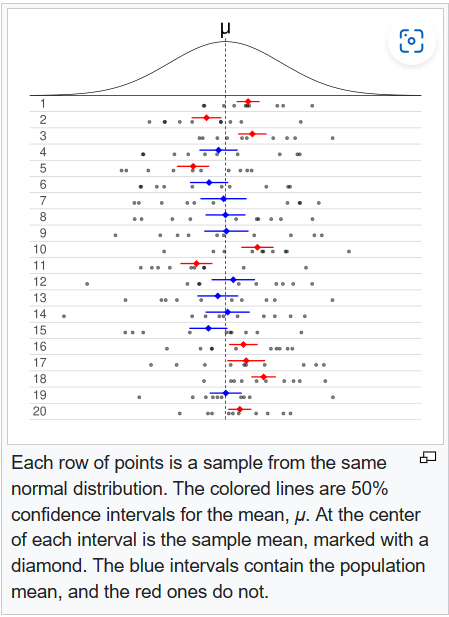

**Common misunderstanding.** ([Source](https://en.wikipedia.org/wiki/Confidence_interval#Common_misunderstandings))
* A 95% confidence level does not mean that for a given realized interval there is a 95% probability that the population parameter lies within the interval.
* A 95% confidence level does not mean that 95% of the sample data lie within the confidence interval.
* A confidence interval is not a definitive range of plausible values for the sample parameter, though it is often heuristically taken as a range of plausible values.
* A particular confidence level of 95% calculated from an experiment does not mean that there is a 95% probability of a sample parameter from a repeat of the experiment falling within this interval.

#### Some methods to estimate Confidence Interval

* From Gaussian: 95% confidence interval is $(\hat{\mu} - 1.96 \hat{\sigma}, \hat{\mu} + 1.96 \hat{\sigma}) = (66364; 85751)$
* Percentile Method: 95% confidence interval is 2.5th-percentile to 97.5th-percentile

In [ ]:
lower_percentile = np.quantile(bootstrap_means, 0.025)
upper_percentile = np.quantile(bootstrap_means, 0.975)
print(f"95% confidence interval using Percentile Method: ({lower_percentile:.2f}; {upper_percentile:.2f})")

## Boostrap for median inference

In [ ]:
# Compute data median
y_median = np.median(y)
print("Data median: ", y_median)

In [ ]:
#  Bootstrap to estimate stds

B = 10000
bootstrap_medians = []
for _ in range(B):
    # Sample from the data with replacement
    sample = np.random.choice(y, size=len(y), replace=True)

    # Compute the mean of the sample
    sample_median = np.median(sample)

    # Append the sample mean to the list of sample means
    bootstrap_medians.append(sample_median)

In [ ]:
sns.distplot(bootstrap_medians, hist=True, kde=True, 
             bins=30, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'color': 'red'})
plt.xlabel('Sample Medians')
plt.title('Distribution of Sample Medians')

In [ ]:
median_bootstrap_mean, median_bootstrap_std = np.mean(bootstrap_medians), np.std(bootstrap_medians)
print("Std Bootstrap mean: {:.2f}, Std Bootstrap std: {:.2f}".format(median_bootstrap_mean, median_bootstrap_std))

In [ ]:
lower_percentile = np.quantile(bootstrap_medians, 0.025)
upper_percentile = np.quantile(bootstrap_medians, 0.975)
print(f"(2.5%-percentile, 97.5%-percentile): ({lower_percentile:.2f}, {upper_percentile:.2f})")

*95% Confidence interval of estimated median*

* Lunneborg Method ([Source](https://www.uvm.edu/~statdhtx/StatPages/Randomization%20Tests/BootstMeans/bootstrapping_means.html)): Let $a$ and $b$ be the distances from the bootstrap mean $\hat{\mu}$ to the 2.5th-percentile and 97.5th-percentile of bootstrap samples, respectively. The 95% confidence interval should be $(\hat{\mu} - b, \hat{\mu} + a)$.

For our case, $a = 68710.36 - 57135 = 11575.36$ and $b = 92839 - 68710.36 = 24128.64$. Hence the 95% confidence interval is $(44581.72; 80285.72)$.

# Bootstrap to estimate uncertainty in Linear Regression

## Estimate uncertainty by Standard Errors

In [ ]:
# Fit linear regression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

# Predicting the Test set results
y_pred = regressor.predict(X)

In [ ]:
plt.scatter(X, y, c='b', label='Data')
plt.plot(X, y_pred, c='r', label='Linear regression')
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.legend()

In [ ]:
# Compute noise std

noise_std = np.sqrt(np.mean((y - y_pred)**2))
print('Noise std: {:.3f}'.format(noise_std))

In [ ]:
# Compute standard errors

X_1 = np.concatenate((X, np.ones_like(X)), axis=-1)
H = np.linalg.inv(X_1.T @ X_1) @ X_1.T
A = (X_1 @ H)** 0.5 * noise_std
se = np.diag(A)
se

In [ ]:
sns.distplot(se, hist=True, kde=True, 
             bins=30, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'color': 'red'})
plt.xlabel('Standard Errors')
plt.title('Distribution of Standard Errors')

In [ ]:
plt.scatter(X, y, c='b', label='data')
plt.plot(X, y_pred, c='r', label='Linear regression')
plt.fill_between(X.reshape(-1), (y_pred - 1.96 * se), (y_pred + 1.96 * se), color='r', alpha=.2)

## Estimate uncertainty by Non-Parametric Bootstrap

In [ ]:
# Bootstrap for 5 samples first

plt.scatter(X, y, c='b', label='Data')

N = len(y)
B = 5
for i in range(B):
    # Sample bootstrap indices
    bootstrap_indices = np.random.choice(N, N, replace=True)

    # Train model on bootstrap sample
    X_bootstrap = X[bootstrap_indices, :]
    y_bootstrap = np.array(y)[bootstrap_indices]
    regressor = LinearRegression()
    regressor.fit(X_bootstrap, y_bootstrap)

    # Predicting on the whole dataset
    y_pred = regressor.predict(X)

    plt.plot(X, y_pred, label=f'Bootstrap Linear regression {i}')
# plt.legend()
    

In [ ]:
# Bootstrap on 10000 samples

B = 10000
bootstrap_predictions = np.array([]).reshape(len(y), 0)
for i in range(B):
    # Sample bootstrap indices
    bootstrap_indices = np.random.choice(N, N, replace=True)

    # Train model on bootstrap sample
    X_bootstrap = X[bootstrap_indices, :]
    y_bootstrap = np.array(y)[bootstrap_indices]
    regressor = LinearRegression()
    regressor.fit(X_bootstrap, y_bootstrap)

    # Predicting on the whole dataset
    y_pred = regressor.predict(X).reshape(len(y), 1)
    bootstrap_predictions = np.concatenate((bootstrap_predictions, y_pred), axis=-1)

In [ ]:
# Histogram of 1st prediction

sns.distplot(bootstrap_predictions[0], hist=True, kde=True, 
             bins=30, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'color': 'red'})

In [ ]:
bootstrap_mean, bootstrap_std = np.mean(bootstrap_predictions, axis=-1), np.std(bootstrap_predictions, axis=-1)

plt.scatter(X, y, c='b', label='data')
plt.plot(X, bootstrap_mean, c='r', label='Bootstrap mean')
plt.fill_between(X.reshape(-1), (bootstrap_mean - 1.96 * bootstrap_std), (bootstrap_mean + 1.96 * bootstrap_std), color='r', alpha=.2)

## Estimate uncertainty by Parametric Bootstrap

We additionaly simulate the responses $y$ by adding Gaussian noise $\mathcal{N}(0, \hat{\sigma}^2)$ to the predicted values, where $\hat{\sigma}^2$ is the estimated noise variance.

In [ ]:
# Bootstrap on 10000 samples

B = 10000
bootstrap_predictions = np.array([]).reshape(len(y), 0)
for i in range(B):
    # Sample bootstrap indices
    bootstrap_indices = np.random.choice(N, N, replace=True)

    # Train model on bootstrap sample
    X_bootstrap = X[bootstrap_indices, :]
    y_bootstrap = np.array(y)[bootstrap_indices]
    regressor = LinearRegression()
    regressor.fit(X_bootstrap, y_bootstrap)

    # Predicting on the whole dataset
    y_pred = regressor.predict(X).reshape(len(y), 1)
    
    # Adding noise to predicted values
    y_pred = y_pred + np.random.normal(0, noise_std, size=y_pred.shape)

    bootstrap_predictions = np.concatenate((bootstrap_predictions, y_pred), axis=-1)

In [ ]:
bootstrap_mean, bootstrap_std = np.mean(bootstrap_predictions, axis=-1), np.std(bootstrap_predictions, axis=-1)

plt.scatter(X, y, c='b', label='data')
plt.plot(X, bootstrap_mean, c='r', label='Bootstrap mean')
plt.fill_between(X.reshape(-1), (bootstrap_mean - 1.96 * bootstrap_std), (bootstrap_mean + 1.96 * bootstrap_std), color='r', alpha=.2)

## Estimate uncertainty by Bootstrap in Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
import random 

# Bootstrap on 10000 samples

B = 10000
alphas = np.arange(0.2, 10, 0.2)

bootstrap_predictions = np.array([]).reshape(len(y), 0)
for i in range(B):
    # Sample bootstrap indices
    bootstrap_indices = np.random.choice(N, N, replace=True)

    # Train model on bootstrap sample
    X_bootstrap = X[bootstrap_indices, :]
    y_bootstrap = np.array(y)[bootstrap_indices]
    regressor = Ridge(alpha=random.choice(alphas))
    regressor.fit(X_bootstrap, y_bootstrap)

    # Predicting on the whole dataset
    y_pred = regressor.predict(X).reshape(len(y), 1)
    bootstrap_predictions = np.concatenate((bootstrap_predictions, y_pred), axis=-1)

In [ ]:
sns.distplot(bootstrap_predictions[0], hist=True, kde=True, 
             bins=30, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'color': 'red'})

In [ ]:
bootstrap_mean, bootstrap_std = np.mean(bootstrap_predictions, axis=-1), np.std(bootstrap_predictions, axis=-1)

plt.scatter(X, y, c='b', label='data')
plt.plot(X, bootstrap_mean, c='r', label='Bootstrap mean')
plt.fill_between(X.reshape(-1), (bootstrap_mean - 1.96 * bootstrap_std), (bootstrap_mean + 1.96 * bootstrap_std), color='r', alpha=.2)